# Import libraries & check dataset

In [8]:
import os
import pandas as pd

data_path = "all"

# List all CSV files
csv_files = [f for f in os.listdir(data_path) if f.endswith(".csv")]
print("CSV files found:", csv_files)

dfs = []  # list to hold individual DataFrames

for file in csv_files:
    temp_df = pd.read_csv(os.path.join(data_path, file))
    dfs.append(temp_df)

# Concatenate all into a single DataFrame
df = pd.concat(dfs, ignore_index=True)
print("Combined dataset shape:", df.shape)
df.head()


CSV files found: ['NIR Clay 45 2.csv', 'MIR Sand 105 0.71.csv', 'NIR Sand 105 0.71.csv', 'NIR Sand 105 2.csv', 'MIR Clay 45 0.71.csv', 'NIR Clay 105 0.2.csv', 'NIR Sand 45 2.csv', 'NIR Sand 45 0.25.csv', 'MIR Clay 105 2.csv', 'MIR Sand 45 0.25.csv', 'MIR Clay 105 0.2.csv', 'NIR Clay 45 0.71.csv', 'NIR Clay 105 2.csv', 'MIR Clay 45 2.csv', 'NIR Sand 45 0.71.csv', 'NIR Clay 105 0.71.csv', 'MIR Sand 105 0.2.csv', 'MIR Clay 105 0.71.csv', 'MIR Clay 45 0.25.csv', 'NIR Clay 45 0.25.csv', 'MIR Sand 105 2.csv', 'NIR Sand 105 0.2.csv', 'MIR Sand 45 0.71.csv', 'MIR Sand 45 2.csv']
Combined dataset shape: (2400, 3986)


,sample_id,amplitude-450.0,amplitude-451.0,amplitude-452.0,amplitude-453.0,amplitude-454.0,amplitude-455.0,amplitude-456.0,amplitude-457.0,amplitude-458.0,...,amplitude-3983.633,amplitude-3985.497,amplitude-3987.3613,amplitude-3989.2253,amplitude-3991.0896,amplitude-3992.9536,amplitude-3994.8179,amplitude-3996.682,amplitude-3998.5461,amplitude-4000.4102
0,1.0,1.381515,1.380588,1.380440,1.378851,1.376481,1.378072,1.378137,1.376888,1.375587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.402217,1.401369,1.400620,1.398908,1.397335,1.400022,1.399366,1.397178,1.396320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.388778,1.386939,1.386259,1.384286,1.381719,1.384275,1.384136,1.382224,1.380987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.387715,1.388084,1.386115,1.383478,1.382264,1.384239,1.383426,1.381748,1.381541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1.371121,1.370850,1.369185,1.367091,1.366143,1.368028,1.367417,1.365984,1.365687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# NAN value handling

In [9]:
print("Missing values per column:\n", df.isna().sum().sort_values(ascending=False).head(20))

Missing values per column:
 amplitude-2442.0       1200
amplitude-1534.1741    1200
amplitude-1509.9404    1200
amplitude-1511.8046    1200
amplitude-1513.6687    1200
amplitude-1515.5328    1200
amplitude-1517.397     1200
amplitude-1519.2611    1200
amplitude-1521.1252    1200
amplitude-1522.9894    1200
amplitude-1524.8534    1200
amplitude-1526.7175    1200
amplitude-1528.5817    1200
amplitude-1530.4458    1200
amplitude-1532.3099    1200
amplitude-1536.0382    1200
amplitude-1681.4398    1200
amplitude-1537.9023    1200
amplitude-1539.7665    1200
amplitude-1541.6306    1200
dtype: int64


In [10]:
# Drop columns with >50% missing
threshold = 0.5
df = df[df.columns[df.isna().mean() < threshold]]
print("Shape after dropping high-NaN columns:", df.shape)


Shape after dropping high-NaN columns: (2400, 5)


In [11]:
# Fill remaining numerical NaNs with column mean
df = df.fillna(df.mean())


In [12]:
print("Total missing values after processing:", df.isna().sum().sum())

Total missing values after processing: 0


# Soil Fertility Classification

In [13]:
# NPK column names
col_N = "N g.Kg-¹"
col_P = "P mg.dm-³"
col_K = "K mmolc.dm-³"

# Fertility classification function
def classify_soil(N, P, K):
    if N > 2 and P > 15 and K > 2:
        return "High Fertility"
    elif N > 1 and P > 8 and K > 1:
        return "Medium Fertility"
    else:
        return "Low Fertility"

df["Fertility"] = df.apply(lambda row: classify_soil(row[col_N], row[col_P], row[col_K]), axis=1)
print("Fertility class distribution:\n", df["Fertility"].value_counts())


Fertility class distribution:
 Fertility
High Fertility      1164
Low Fertility        756
Medium Fertility     480
Name: count, dtype: int64


# Fertilizer Recommendation

In [14]:
# Example list of government-approved fertilizers
govt_fertilizers = ["Urea", "DAP", "MOP", "SSP", "Nitrophos"]

def recommend_fertilizer(fertility):
    if fertility == "High Fertility":
        fert = {"fertilizer": "MOP", "amount_kg_per_hectare": 50, "interval_days": 90}
    elif fertility == "Medium Fertility":
        fert = {"fertilizer": "DAP", "amount_kg_per_hectare": 100, "interval_days": 60}
    else:  # Low Fertility
        fert = {"fertilizer": "Urea", "amount_kg_per_hectare": 150, "interval_days": 45}
    
    # Check government approval
    if fert["fertilizer"] not in govt_fertilizers:
        fert["fertilizer"] = govt_fertilizers[0]  # replace with first approved fertilizer
    
    return fert

# Apply recommendation
df["Recommendation"] = df["Fertility"].apply(lambda x: recommend_fertilizer(x))

# Display sample recommendations 
df[["Fertility", "Recommendation"]].head(10)


,Fertility,Recommendation
0,Low Fertility,"{'fertilizer': 'Urea', 'amount_kg_per_hectare'..."
1,Low Fertility,"{'fertilizer': 'Urea', 'amount_kg_per_hectare'..."
2,Low Fertility,"{'fertilizer': 'Urea', 'amount_kg_per_hectare'..."
3,Low Fertility,"{'fertilizer': 'Urea', 'amount_kg_per_hectare'..."
4,Low Fertility,"{'fertilizer': 'Urea', 'amount_kg_per_hectare'..."
5,Low Fertility,"{'fertilizer': 'Urea', 'amount_kg_per_hectare'..."
6,Medium Fertility,"{'fertilizer': 'DAP', 'amount_kg_per_hectare':..."
7,High Fertility,"{'fertilizer': 'MOP', 'amount_kg_per_hectare':..."
8,High Fertility,"{'fertilizer': 'MOP', 'amount_kg_per_hectare':..."
9,High Fertility,"{'fertilizer': 'MOP', 'amount_kg_per_hectare':..."


# Prepare features and target

In [17]:
# Keep only numeric columns
numeric_cols = df.select_dtypes(include="number").columns
X = df[numeric_cols]
y = df["Fertility"]

# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Numeric features used:", X.shape[1])

Numeric features used: 5


# Train RandomForest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# Optional: Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Confusion Matrix:
 [[233   0   0]
 [  0 151   0]
 [  0   0  96]]

Classification Report:
                   precision    recall  f1-score   support

  High Fertility       1.00      1.00      1.00       233
   Low Fertility       1.00      1.00      1.00       151
Medium Fertility       1.00      1.00      1.00        96

        accuracy                           1.00       480
       macro avg       1.00      1.00      1.00       480
    weighted avg       1.00      1.00      1.00       480



In [28]:
def classify_soil(N, P, K):
    if N < 1.5 or P < 10 or K < 1.0:
        return "Low Fertility"
    elif N > 2.5 or P > 20 or K > 2.0:
        return "High Fertility"
    else:
        return "Medium Fertility"

col_N = 'N g.Kg-¹'
col_P = 'P mg.dm-³'
col_K = 'K mmolc.dm-³'

df["Fertility_Label"] = df.apply(lambda row: classify_soil(row[col_N], row[col_P], row[col_K]), axis=1)

In [29]:
# Select only N, P, K as features
X_simple = df[[col_N, col_P, col_K]]
y_simple = df["Fertility_Label"]

# Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42, stratify=y_simple
)

# Train model
model_simple = RandomForestClassifier(n_estimators=200, random_state=42)
model_simple.fit(X_train_s, y_train_s)

print("Training accuracy (NPK only):", model_simple.score(X_train_s, y_train_s))
print("Testing accuracy (NPK only):", model_simple.score(X_test_s, y_test_s))

Training accuracy (NPK only): 1.0
Testing accuracy (NPK only): 1.0


# Plot Confusion Matrix

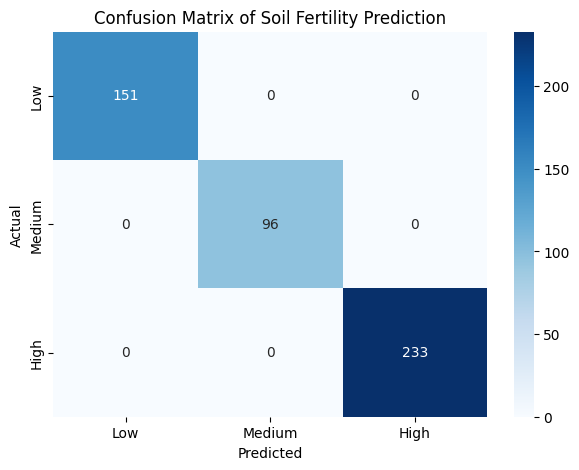

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=["Low Fertility", "Medium Fertility", "High Fertility"])

# Plot
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Soil Fertility Prediction")
plt.show()

# Plot Prediction Distribution

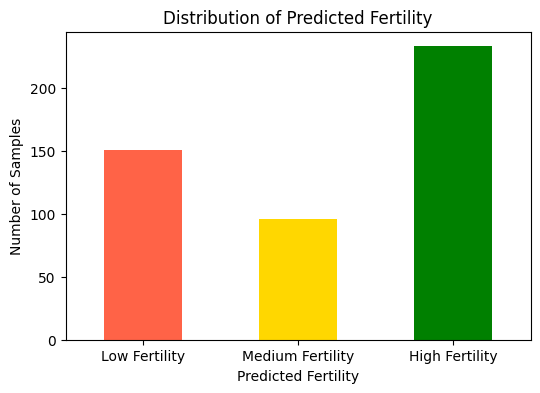

In [20]:
# Count of predictions
pred_counts = pd.Series(y_test_pred).value_counts().reindex(["Low Fertility", "Medium Fertility", "High Fertility"])

# Plot
plt.figure(figsize=(6,4))
pred_counts.plot(kind='bar', color=['tomato', 'gold', 'green'])
plt.xlabel("Predicted Fertility")
plt.ylabel("Number of Samples")
plt.title("Distribution of Predicted Fertility")
plt.xticks(rotation=0)
plt.show()

# Government-approved fertilizers

In [21]:
# Example list of government-approved fertilizers
govt_fertilizers = ["Urea", "DAP", "MOP", "SSP", "Nitrophos"]

# Recommendation function

In [22]:
def recommend_fertilizer(fertility):
    if fertility == "High Fertility":
        fert = {"fertilizer": "MOP", "amount_kg_per_hectare": 50, "interval_days": 90}
    elif fertility == "Medium Fertility":
        fert = {"fertilizer": "DAP", "amount_kg_per_hectare": 100, "interval_days": 60}
    else:  # Low Fertility
        fert = {"fertilizer": "Urea", "amount_kg_per_hectare": 150, "interval_days": 45}
    
    # Ensure government-approved fertilizer
    if fert["fertilizer"] not in govt_fertilizers:
        fert["fertilizer"] = govt_fertilizers[0]  # replace with first approved fertilizer
    
    return fert

# Apply recommendations to ML predictions

In [24]:
# Expand 'Recommendation' dict into separate columns
recommendations_df = df['Recommendation'].apply(pd.Series)

# Merge back into original df (optional: drop old 'Recommendation' column)
df = pd.concat([df.drop(columns=['Recommendation']), recommendations_df], axis=1)

# Show compact output
compact_cols = ["Predicted_Fertility", "fertilizer", "amount_kg_per_hectare", "interval_days"]
df[compact_cols].head(10)

,Predicted_Fertility,fertilizer,amount_kg_per_hectare,interval_days
0,Low Fertility,Urea,150,45
1,Low Fertility,Urea,150,45
2,Low Fertility,Urea,150,45
3,Low Fertility,Urea,150,45
4,Low Fertility,Urea,150,45
5,Low Fertility,Urea,150,45
6,Medium Fertility,DAP,100,60
7,High Fertility,MOP,50,90
8,High Fertility,MOP,50,90
9,High Fertility,MOP,50,90


# Define the interactive function

In [25]:
def predict_and_recommend(new_sample):
    """
    new_sample: dict of {feature_name: value}, e.g.,
        {'N g.Kg-¹': 1.5, 'P mg.dm-³': 10, 'K mmolc.dm-³': 1.2, ...}
    """
    # Convert to DataFrame
    sample_df = pd.DataFrame([new_sample])
    
    # Keep only numeric columns that match training data
    sample_X = sample_df[X.columns.intersection(sample_df.columns)]
    
    # Predict Fertility
    pred_fertility = model.predict(sample_X)[0]
    
    # Recommend fertilizer
    recommendation = recommend_fertilizer(pred_fertility)
    
    # Combine output in one dict
    output = {
        "Predicted_Fertility": pred_fertility,
        "fertilizer": recommendation["fertilizer"],
        "amount_kg_per_hectare": recommendation["amount_kg_per_hectare"],
        "interval_days": recommendation["interval_days"]
    }
    
    return output

In [31]:
# Prediction function using only NPK
def predict_and_recommend_npk(new_sample):
    # Convert dict to DataFrame
    sample_df = pd.DataFrame([new_sample])
    
    # Only N, P, K columns
    sample_X = sample_df[[col_N, col_P, col_K]]
    
    # Predict fertility using the NPK-only model
    pred_fertility = model_simple.predict(sample_X)[0]
    
    # Recommend fertilizer
    recommendation = recommend_fertilizer(pred_fertility)
    
    # Return combined output
    return {
        "Predicted_Fertility": pred_fertility,
        "Recommendation": recommendation
    }

In [36]:
def predict_and_recommend_interactive(new_sample, use_full_spectral=False):
    sample_df = pd.DataFrame([new_sample])
    
    if use_full_spectral:
        sample_X = sample_df[X.columns.intersection(sample_df.columns)]
        pred_fertility = model.predict(sample_X)[0]
    else:
        sample_X = sample_df[[col_N, col_P, col_K]]
        pred_fertility = model_simple.predict(sample_X)[0]
    
    recommendation = recommend_fertilizer(pred_fertility)
    
    return {
        "Predicted_Fertility": pred_fertility,
        "Recommendation": recommendation
    }

# Example Usage

In [35]:
# %% [shell 8]
# Example usage: NPK-only input
new_soil_sample = {
    'N g.Kg-¹': 1.8,
    'P mg.dm-³': 12,
    'K mmolc.dm-³': 1.5,
}

result_npk = predict_and_recommend_interactive(new_soil_sample, use_full_spectral=False)
print("NPK-only model output:\n", result_npk)


NPK-only model output:
 {'Predicted_Fertility': 'High Fertility', 'Recommendation': {'fertilizer': 'MOP', 'amount_kg_per_hectare': 50, 'interval_days': 90}}


# Voice Interaction and Multilingual Features

# Voice Input (Multilingual)

In [39]:
import speech_recognition as sr
from langdetect import detect

def get_voice_input():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("Please speak your soil values (N, P, K)...")
        audio = r.listen(source)
    try:
        text = r.recognize_google(audio)
        print("You said:", text)
        detected_lang = detect(text)
        print("Detected language:", detected_lang)
        return text, detected_lang
    except Exception as e:
        print("Error recognizing speech:", e)
        return None, None

# Translation Helper

In [40]:
from googletrans import Translator

translator = Translator()

def translate_text(text, dest_lang="en"):
    # dest_lang = Google language code, e.g., 'hi' for Hindi
    translation = translator.translate(text, dest=dest_lang)
    return translation.text

# Voice Output

In [41]:
# %% [shell 3]
from gtts import gTTS
import playsound
import tempfile

def speak_text(text, lang="en"):
    tts = gTTS(text=text, lang=lang)
    with tempfile.NamedTemporaryFile(delete=True, suffix=".mp3") as fp:
        tts.save(fp.name)
        playsound.playsound(fp.name)

# Extract Soil Values from Text

In [42]:
import re

def parse_soil_values(text):
    try:
        numbers = re.findall(r"[-+]?\d*\.\d+|\d+", text)
        if len(numbers) >= 3:
            return {
                'N g.Kg-¹': float(numbers[0]),
                'P mg.dm-³': float(numbers[1]),
                'K mmolc.dm-³': float(numbers[2])
            }
        else:
            return None
    except:
        return None

# Multilingual Chatbot Function

In [43]:
def chatbot_voice_interactive():
    text, lang_detected = get_voice_input()
    if text is None:
        speak_text("Sorry, I could not understand you. Please try again.", lang="en")
        return
    
    soil_values = parse_soil_values(text)
    if soil_values is None:
        speak_text("Could not extract N, P, K values. Please speak clearly.", lang="en")
        return
    
    # Predict using NPK model
    result = predict_and_recommend_interactive(soil_values, use_full_spectral=False)
    
    response_text = f"Predicted Fertility: {result['Predicted_Fertility']}. " \
                    f"Use {result['Recommendation']['fertilizer']} " \
                    f"at {result['Recommendation']['amount_kg_per_hectare']} kg per hectare."
    
    # Translate response if input was not English
    if lang_detected != "en":
        response_text = translate_text(response_text, dest_lang=lang_detected)
    
    print(response_text)
    speak_text(response_text, lang=lang_detected)

# Run the Chatbot

In [45]:
chatbot_voice_interactive()

Please speak your soil values (N, P, K)...
You said: 0.8 0.6 0.2
Error recognizing speech: No features in text.
